<a href="https://colab.research.google.com/github/jess22jess/EDP/blob/main/EDP21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

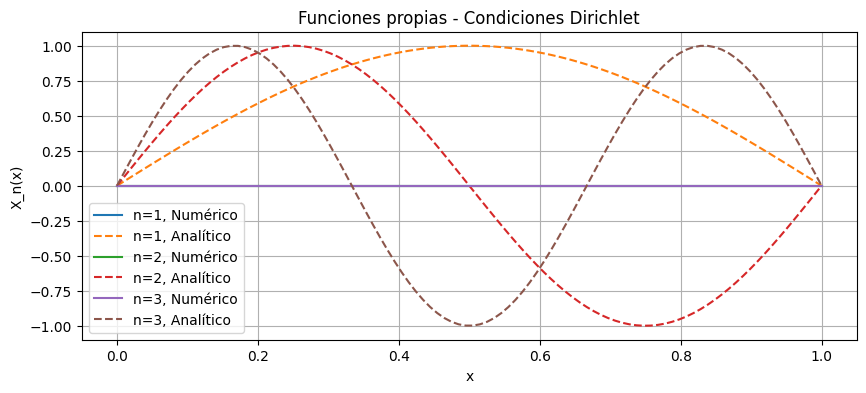

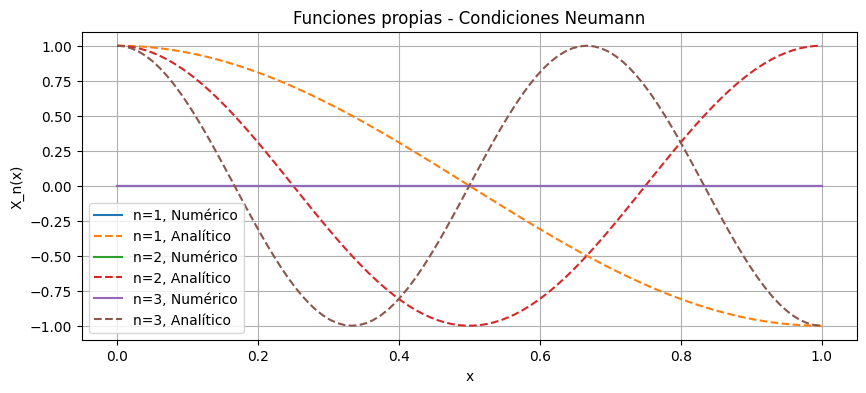

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp

def odes(x, y, lambda_n):
    return np.vstack([y[1], -lambda_n * y[0]])


def bc_dirichlet(ya, yb):
    return np.array([ya[0], yb[0]])


def bc_neumann(ya, yb):
    return np.array([ya[1], yb[1]])


x_vals = np.linspace(0, 1, 100)


n_values = [1, 2, 3]
dirichlet_solutions = []
for n in n_values:
    lambda_n = (n * np.pi) ** 2
    y_init = np.zeros((2, x_vals.size))
    sol = solve_bvp(lambda x, y: odes(x, y, lambda_n), bc_dirichlet, x_vals, y_init)
    dirichlet_solutions.append(sol.sol(x_vals)[0])

neumann_solutions = []
for n in n_values:
    lambda_n = (n * np.pi) ** 2
    y_init = np.zeros((2, x_vals.size))
    sol = solve_bvp(lambda x, y: odes(x, y, lambda_n), bc_neumann, x_vals, y_init)
    neumann_solutions.append(sol.sol(x_vals)[0])


plt.figure(figsize=(10, 4))
for i, sol in enumerate(dirichlet_solutions):
    plt.plot(x_vals, sol, label=f"n={n_values[i]}, Numérico")
    plt.plot(x_vals, np.sin(n_values[i] * np.pi * x_vals), '--', label=f"n={n_values[i]}, Analítico")
plt.title("Funciones propias - Condiciones Dirichlet")
plt.xlabel("x")
plt.ylabel("X_n(x)")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 4))
for i, sol in enumerate(neumann_solutions):
    plt.plot(x_vals, sol, label=f"n={n_values[i]}, Numérico")
    plt.plot(x_vals, np.cos(n_values[i] * np.pi * x_vals), '--', label=f"n={n_values[i]}, Analítico")
plt.title("Funciones propias - Condiciones Neumann")
plt.xlabel("x")
plt.ylabel("X_n(x)")
plt.legend()
plt.grid(True)
plt.show()
